In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


Following what the papers say as "statistically significant"

In [3]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [4]:
# to predict mortality, these columns are considered important
mortality_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'GradeofKidneyCategory',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'GENDER'
]

mortality_cares = cares[mortality_significant_columns + ['Mortality']]

In [5]:
mortality_cares = mortality_cares.dropna(how='any')

In [6]:
mortality_cares.shape

(76064, 15)

In [7]:
mortality_cares["Mortality"].isna().value_counts()

Mortality
False    76064
Name: count, dtype: int64

In [8]:
mortality_cares["Mortality"].value_counts()

Mortality
0    71083
1     4981
Name: count, dtype: int64

In [9]:
icu_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'GradeofKidneyCategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'PriorityCategory',
    'GENDER'
]
# same as mortality, but with surgical priority column (Priority Category)

icu_cares = cares[icu_significant_columns + ["ICUAdmgt24h"]]

In [10]:
icu_cares = icu_cares.dropna(how='any')

In [11]:
icu_cares["ICUAdmgt24h"].value_counts()

ICUAdmgt24h
0    75008
1     1056
Name: count, dtype: int64

In [12]:
icu_cares.shape

(76064, 16)

Save as CSV

In [13]:
mortality_cares.to_csv("../data/CARES_mortality_dropna.csv", index=False)
icu_cares.to_csv("../data/CARES_ICU_dropna.csv", index=False)

# Simple Modeling

## Mortality

In [14]:
RANDOM_SEED = 3402

In [15]:
np.random.seed(RANDOM_SEED)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = mortality_cares.drop('Mortality', axis=1)
y = mortality_cares['Mortality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

Oversampling

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE()

x_res, y_res = smote.fit_resample(x_train, y_train)

In [20]:
evaluation_tpr_fpr = {}

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [22]:
logreg_mort = LogisticRegression(random_state=RANDOM_SEED)
rf_mort = RandomForestClassifier(random_state=RANDOM_SEED)

# apply the same for smote data
logreg_mort_smote = LogisticRegression(random_state=RANDOM_SEED)
rf_mort_smote = RandomForestClassifier(random_state=RANDOM_SEED)

#### Logistic Regression

In [23]:
logreg_mort.fit(x_train, y_train)
logreg_mort_smote.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [24]:
rf_mort.fit(x_train, y_train)
rf_mort_smote.fit(x_res, y_res)

RandomForestClassifier(random_state=3402)

In [57]:
y_pred = logreg_mort.predict(x_test)
y_pred_proba = logreg_mort.predict_proba(x_test)

In [58]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, precision_recall_curve, confusion_matrix

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.51      0.10      0.17      1494

    accuracy                           0.93     22820
   macro avg       0.72      0.55      0.57     22820
weighted avg       0.91      0.93      0.91     22820



In [60]:
f1_score(y_test, y_pred)

0.16759776536312848

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [62]:
auc(fpr, tpr)

0.856316525597843

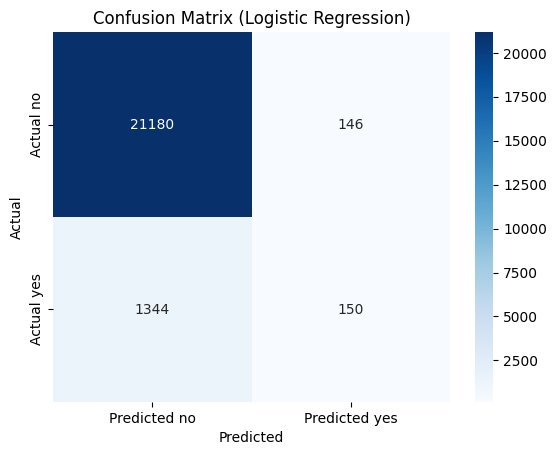

In [63]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [64]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
normalized_conf_mat

,Predicted no,Predicted yes
Actual no,0.94033,0.493243
Actual yes,0.05967,0.506757


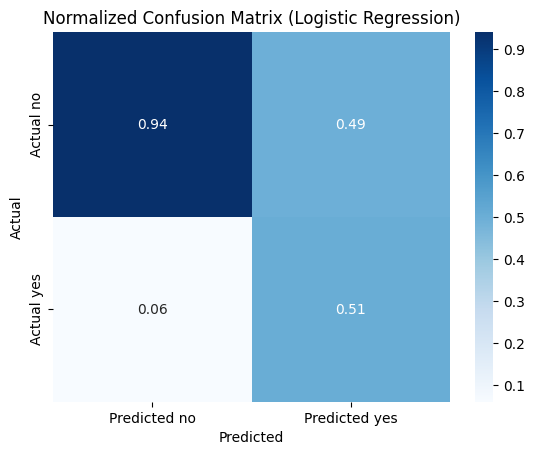

In [65]:
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression)')
plt.show()

In [66]:
evaluation_tpr_fpr["Logistic Regression"] = (fpr, tpr)

#### Logistic Regression SMOTE

In [67]:
y_pred = logreg_mort_smote.predict(x_test)
y_pred_proba = logreg_mort_smote.predict_proba(x_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     21326
           1       0.21      0.76      0.33      1494

    accuracy                           0.80     22820
   macro avg       0.59      0.78      0.60     22820
weighted avg       0.93      0.80      0.84     22820



In [69]:
f1_score(y_test, y_pred)

0.3267197682838523

In [70]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [71]:
auc(fpr, tpr)

0.8519515085569701

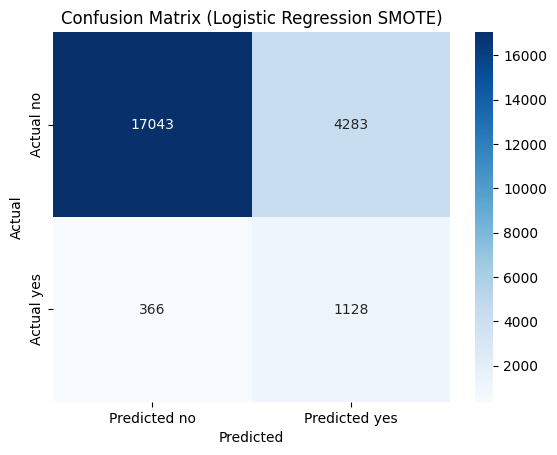

In [72]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

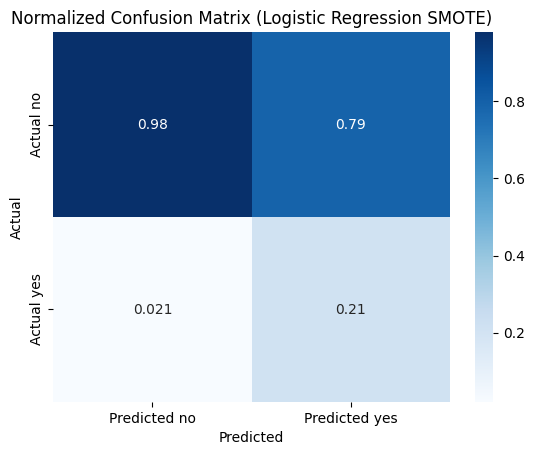

In [73]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

In [74]:
evaluation_tpr_fpr["Logistic Regression SMOTE"] = (fpr, tpr)

#### Random Forest

In [75]:
y_pred = rf_mort.predict(x_test)
y_pred_proba = rf_mort.predict_proba(x_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21326
           1       0.43      0.15      0.23      1494

    accuracy                           0.93     22820
   macro avg       0.69      0.57      0.60     22820
weighted avg       0.91      0.93      0.92     22820



In [77]:
f1_score(y_test, y_pred)

0.22702702702702704

In [78]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.8061623781066309

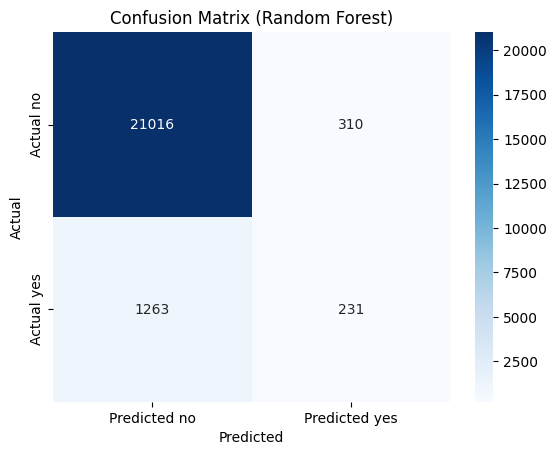

In [79]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

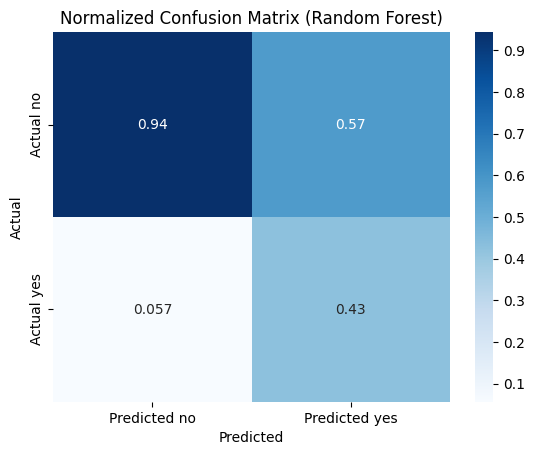

In [80]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest)')
plt.show()

In [81]:
evaluation_tpr_fpr["Random Forest"] = (fpr, tpr)

#### Random Forest SMOTE

In [82]:
y_pred = rf_mort_smote.predict(x_test)
y_pred_proba = rf_mort_smote.predict_proba(x_test)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     21326
           1       0.21      0.50      0.30      1494

    accuracy                           0.84     22820
   macro avg       0.59      0.69      0.60     22820
weighted avg       0.91      0.84      0.87     22820



In [84]:
f1_score(y_test, y_pred)

0.29710001972775696

In [85]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.7535128164664033

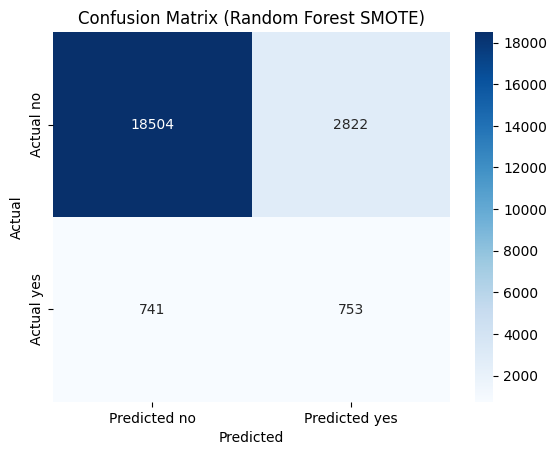

In [86]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest SMOTE)')
plt.show()

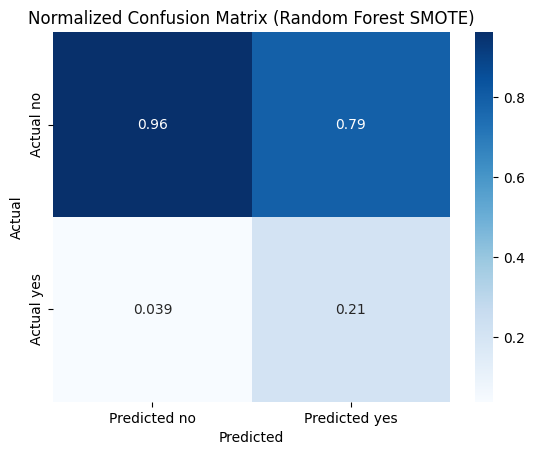

In [87]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest SMOTE)')
plt.show()

In [88]:
evaluation_tpr_fpr["Random Forest SMOTE"] = (fpr, tpr)

In [89]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

#### Neural Net

In [90]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [91]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [92]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [93]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - auc: 0.6016 - f1_score: 0.1247 - loss: 0.3071 - val_auc: 0.8413 - val_f1_score: 0.1229 - val_loss: 0.1888
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8286 - f1_score: 0.1207 - loss: 0.1913 - val_auc: 0.8525 - val_f1_score: 0.1229 - val_loss: 0.1839
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8386 - f1_score: 0.1250 - loss: 0.1919 - val_auc: 0.8534 - val_f1_score: 0.1229 - val_loss: 0.1842
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - auc: 0.8466 - f1_score: 0.1236 - loss: 0.1868 - val_auc: 0.8558 - val_f1_score: 0.1229 - val_loss: 0.1825
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - auc: 0.8516 - f1_score: 0.1255 - loss: 0.1876 - val_auc: 0.8584 - val_f1_score: 0.1229 - val_loss: 0.1819
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - auc: 0.8544 - f1_score: 0.1197 - loss: 0.1795 - val_auc: 0.8597 - val_f1_score: 0.1229 - val_loss: 0.1812
Epoch 7/10
1664/

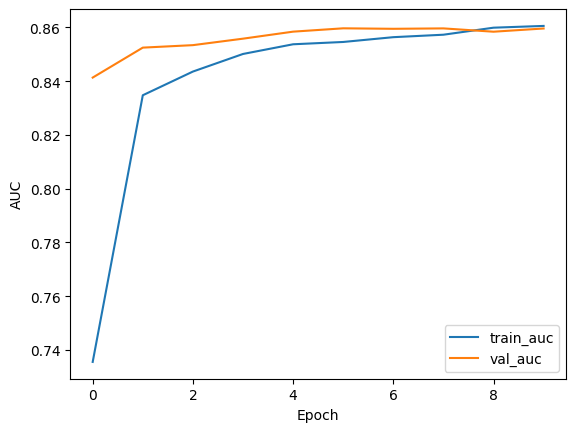

In [95]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [96]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step


In [119]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [121]:
f1_score(y_test, y_pred)

0.057803468208092484

In [122]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8598666446711539

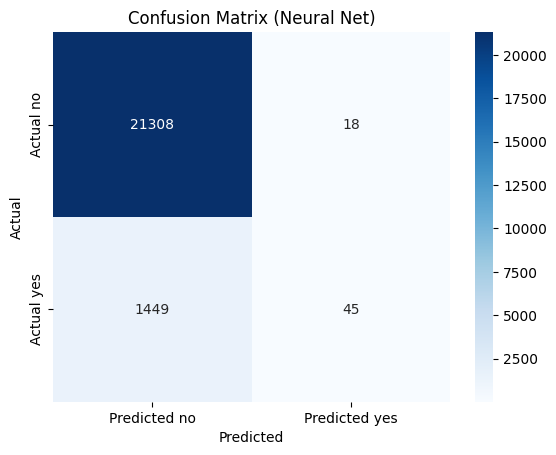

In [123]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

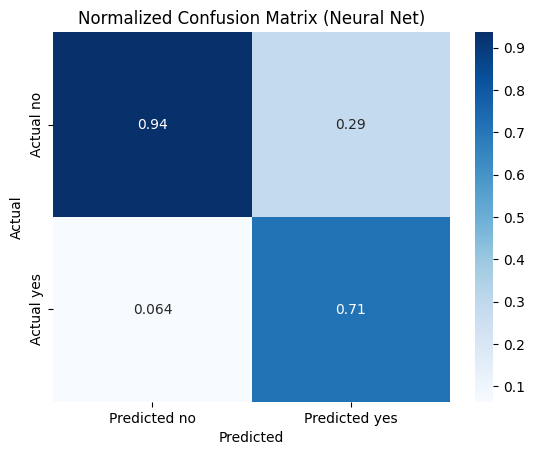

In [124]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [125]:
evaluation_tpr_fpr["Neural Net"] = (fpr, tpr)

#### Neural Net SMOTE

In [126]:
model_smote = Sequential()
model_smote.add(Input((X.shape[1],)))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(1, activation='sigmoid'))

In [127]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [128]:
model_smote.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
history = model_smote.fit(x_res, y_res, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - auc: 0.8087 - f1_score: 0.6676 - loss: 0.5297 - val_auc: 0.8530 - val_f1_score: 0.1229 - val_loss: 0.4516
Epoch 2/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - auc: 0.8587 - f1_score: 0.6656 - loss: 0.4682 - val_auc: 0.8520 - val_f1_score: 0.1229 - val_loss: 0.5433
Epoch 3/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - auc: 0.8627 - f1_score: 0.6651 - loss: 0.4621 - val_auc: 0.8547 - val_f1_score: 0.1229 - val_loss: 0.4982
Epoch 4/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - auc: 0.8644 - f1_score: 0.6655 - loss: 0.4597 - val_auc: 0.8528 - val_f1_score: 0.1229 - val_loss: 0.4552
Epoch 5/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - auc: 0.8667 - f1_score: 0.6659 - loss: 0.4557 - val_auc: 0.8510 - val_f1_score: 0.1229 - val_loss: 0.4323
Epoch 6/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - auc: 0.8676 - f1_score: 0.6676 - loss: 0.4539 - val_auc: 0.8519 - val_f1_score: 0.1229 - val_loss: 0.4725
Epoch 7/10
3110/

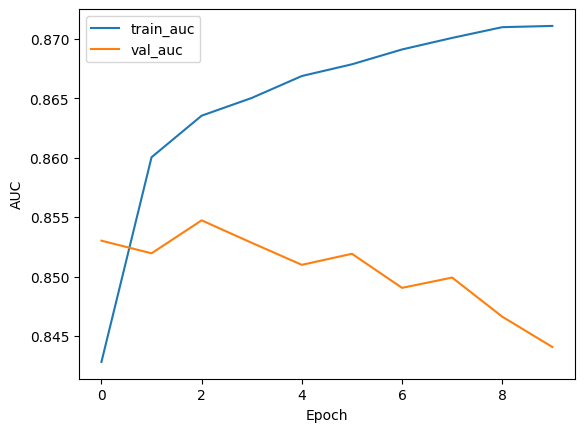

In [130]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [131]:
y_pred_proba = model_smote.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [132]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [134]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8440988939345491

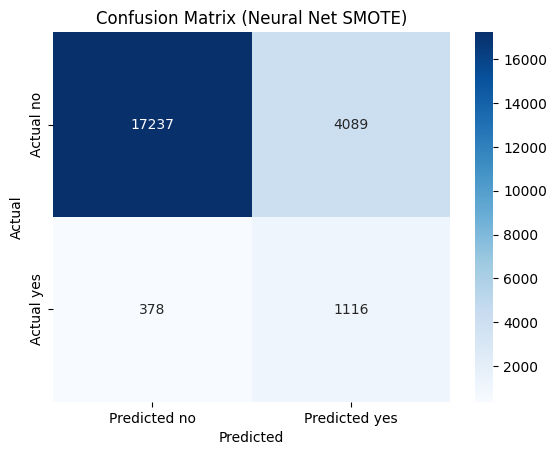

In [133]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

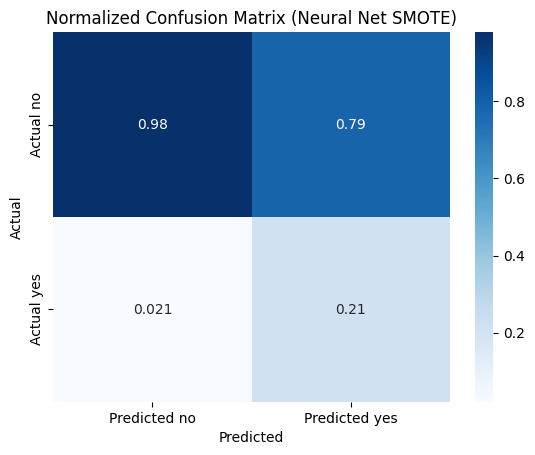

In [135]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [136]:
evaluation_tpr_fpr["Neural Net SMOTE"] = (fpr, tpr)

#### XGBoost

In [137]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.49      0.12      0.19      1494

    accuracy                           0.93     22820
   macro avg       0.72      0.56      0.58     22820
weighted avg       0.91      0.93      0.92     22820

0.19257665411511565


0.8559282300981725

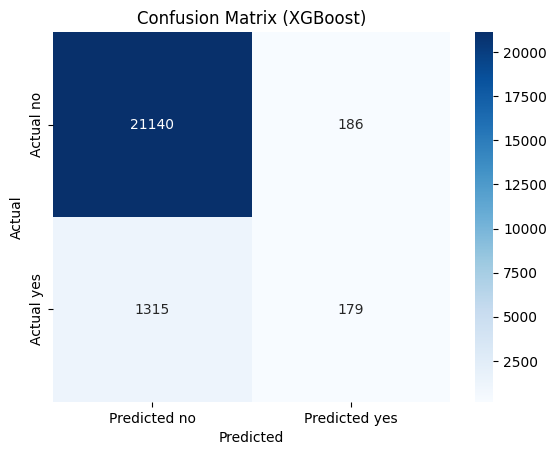

In [138]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

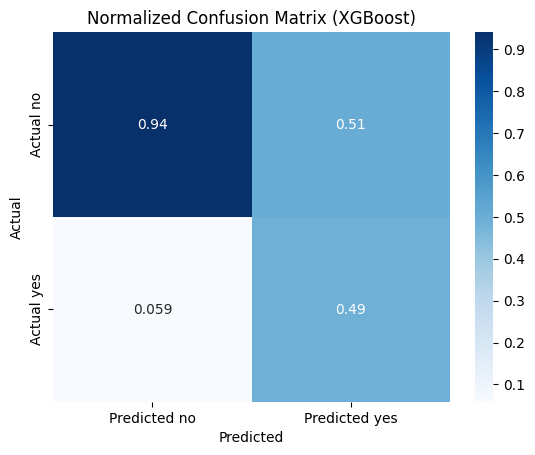

In [141]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost)')
plt.show()

In [139]:
evaluation_tpr_fpr["XGBoost"] = (fpr, tpr)

#### XGBoost SMOTE

In [140]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_res, y_res)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.97      0.85      0.90     21326
           1       0.22      0.61      0.32      1494

    accuracy                           0.83     22820
   macro avg       0.59      0.73      0.61     22820
weighted avg       0.92      0.83      0.87     22820

0.3213778409090909


0.804940651034536

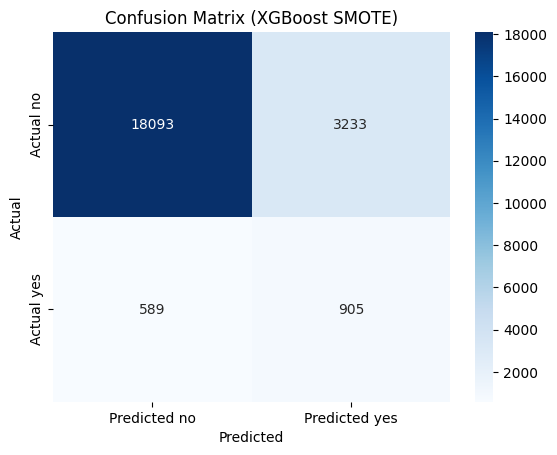

In [142]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost SMOTE)')
plt.show()

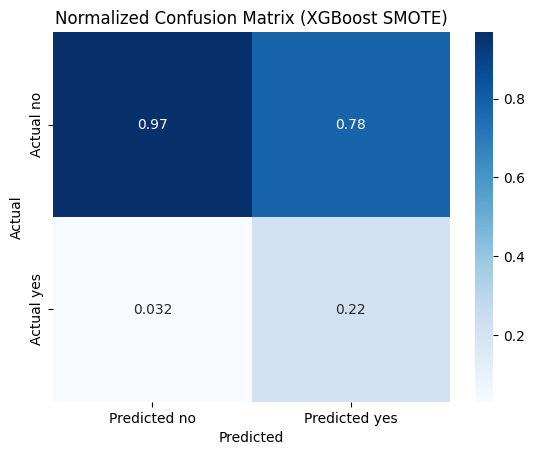

In [143]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost SMOTE)')
plt.show()

In [144]:
evaluation_tpr_fpr["XGBoost SMOTE"] = (fpr, tpr)

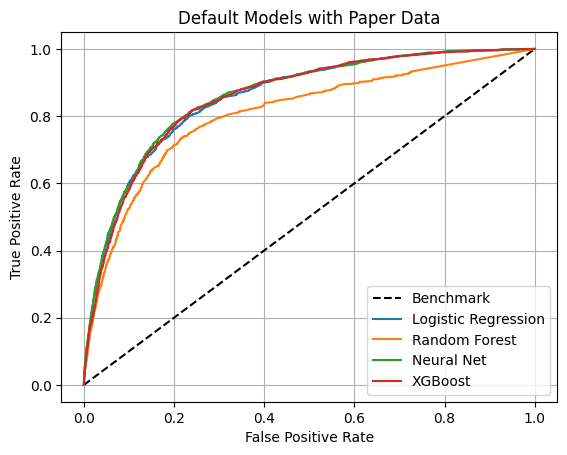

In [145]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    if "SMOTE" in model_name:
        continue
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

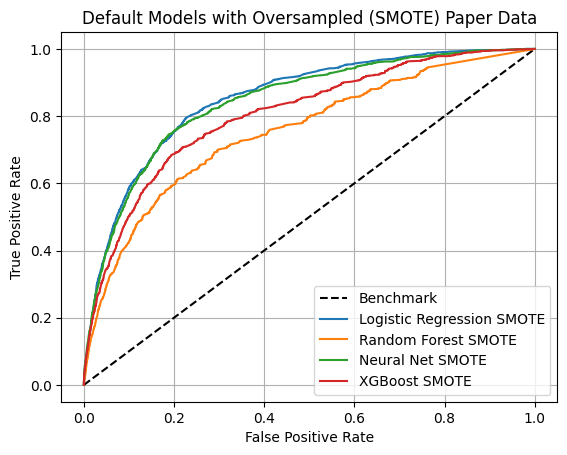

In [146]:
plt.title("Default Models with Oversampled (SMOTE) Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    if "SMOTE" not in model_name:
        continue
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

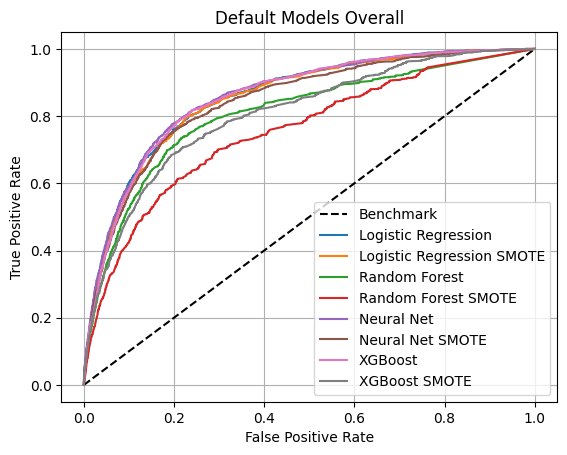

In [147]:
plt.title("Default Models Overall")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

## ICU

In [148]:
X = icu_cares.drop('ICUAdmgt24h', axis=1)
y = icu_cares['ICUAdmgt24h']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

In [149]:
x_res, y_res = smote.fit_resample(x_train, y_train)

In [150]:
evaluation_tpr_fpr = {}

In [151]:
x_res.shape

(105010, 15)

#### Logistic Regression

In [152]:
logreg_icu = LogisticRegression(random_state=RANDOM_SEED)

In [153]:
logreg_icu.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [154]:
y_pred = logreg_icu.predict(x_test)
y_pred_proba = logreg_icu.predict_proba(x_test)

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     22503
           1       0.06      0.78      0.11       317

    accuracy                           0.83     22820
   macro avg       0.53      0.80      0.51     22820
weighted avg       0.98      0.83      0.90     22820



In [156]:
f1_score(y_test, y_pred)

0.11299954065227377

In [157]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [158]:
auc(fpr, tpr)

0.8698077550403025

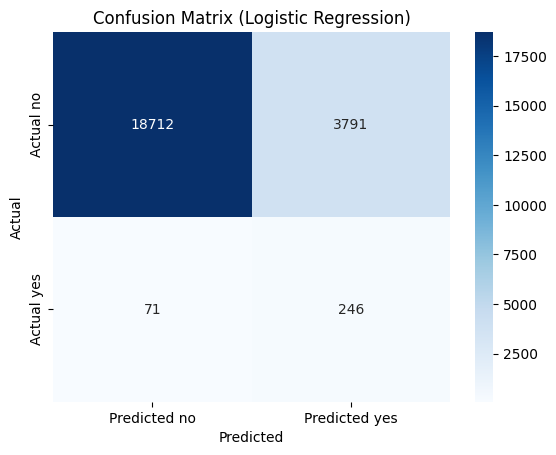

In [159]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

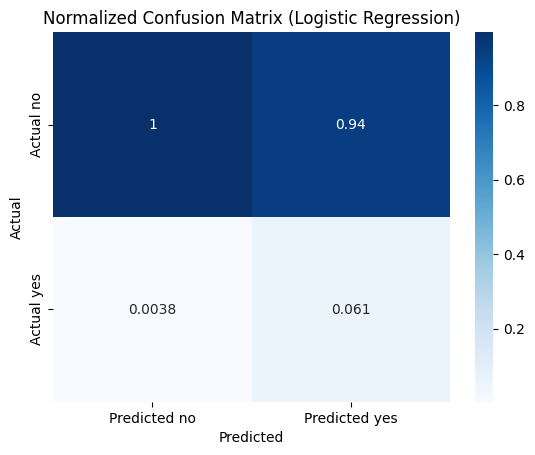

In [160]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression)')
plt.show()

In [161]:
evaluation_tpr_fpr["Logistic Regression"] = (fpr, tpr)

#### Logistic Regression SMOTE

In [162]:
logreg_icu_smote = LogisticRegression(random_state=RANDOM_SEED)

In [163]:
logreg_icu_smote.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [164]:
y_pred = logreg_icu_smote.predict(x_test)
y_pred_proba = logreg_icu_smote.predict_proba(x_test)

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     22503
           1       0.06      0.78      0.11       317

    accuracy                           0.83     22820
   macro avg       0.53      0.80      0.51     22820
weighted avg       0.98      0.83      0.90     22820



In [166]:
f1_score(y_test, y_pred)

0.11299954065227377

In [167]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [168]:
auc(fpr, tpr)

0.8698077550403025

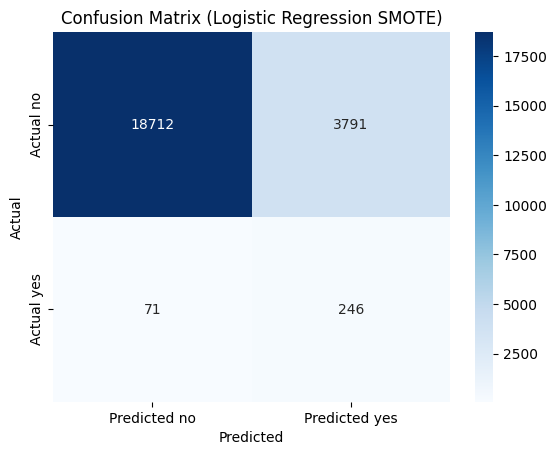

In [169]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

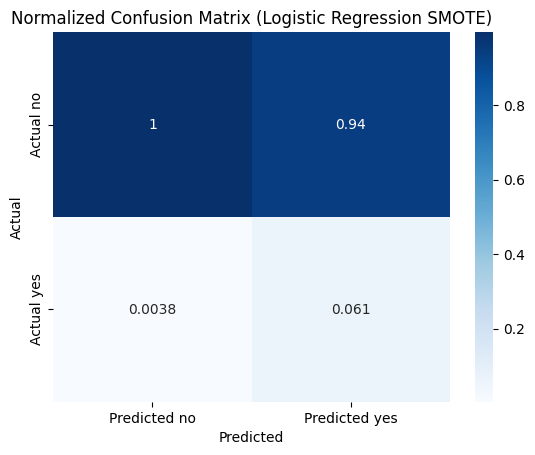

In [170]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

In [171]:
evaluation_tpr_fpr["Logistic Regression SMOTE"] = (fpr, tpr)

#### Random Forest

In [178]:
rf_icu = RandomForestClassifier(random_state=RANDOM_SEED)

In [179]:
rf_icu.fit(x_train, y_train)
y_pred = rf_icu.predict(x_test)
y_pred_proba = rf_icu.predict_proba(x_test)
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)
evaluation_tpr_fpr["Random Forest"] = (fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.22      0.06      0.09       317

    accuracy                           0.98     22820
   macro avg       0.60      0.53      0.54     22820
weighted avg       0.98      0.98      0.98     22820



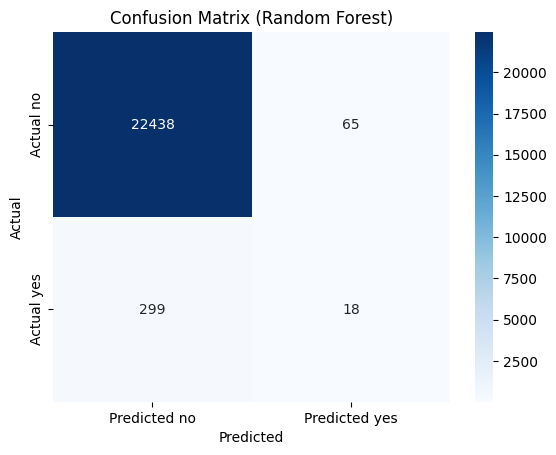

In [180]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

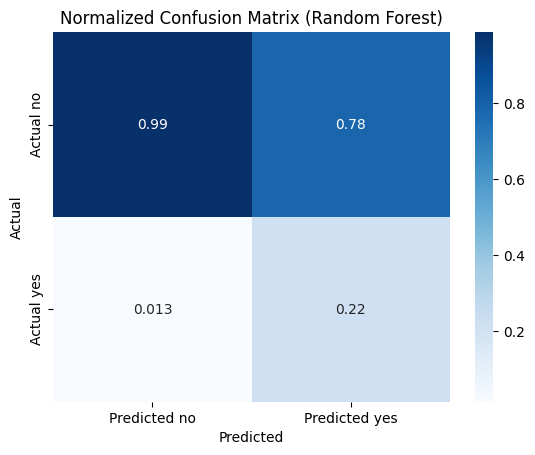

In [181]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest)')
plt.show()

#### Random Forest SMOTE


In [174]:
rf_icu_smote = RandomForestClassifier(random_state=RANDOM_SEED)
rf_icu_smote.fit(x_res, y_res)
y_pred = rf_icu_smote.predict(x_test)
y_pred_proba = rf_icu_smote.predict_proba(x_test)

In [175]:
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)
evaluation_tpr_fpr["Random Forest SMOTE"] = (fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22503
           1       0.05      0.21      0.08       317

    accuracy                           0.93     22820
   macro avg       0.52      0.58      0.52     22820
weighted avg       0.98      0.93      0.95     22820



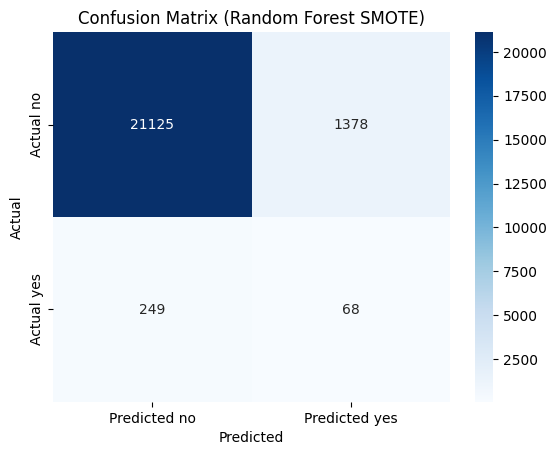

In [176]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest SMOTE)')
plt.show()

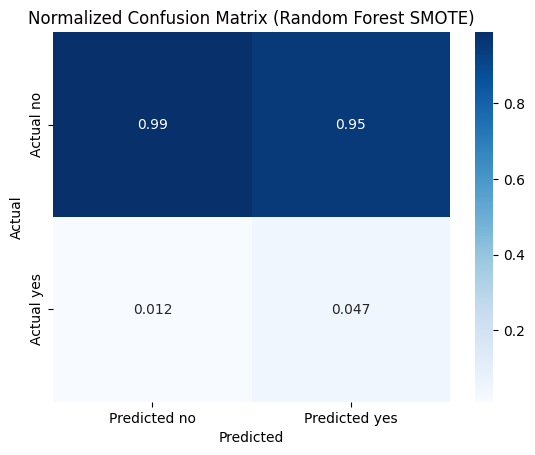

In [177]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest SMOTE)')
plt.show()

#### Neural Network

In [182]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [183]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - auc: 0.5220 - f1_score: 0.0282 - loss: 0.1540 - val_auc: 0.8531 - val_f1_score: 0.0274 - val_loss: 0.0578
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - auc: 0.8344 - f1_score: 0.0265 - loss: 0.0586 - val_auc: 0.8721 - val_f1_score: 0.0274 - val_loss: 0.0562
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - auc: 0.8696 - f1_score: 0.0277 - loss: 0.0554 - val_auc: 0.8710 - val_f1_score: 0.0274 - val_loss: 0.0560
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - auc: 0.8662 - f1_score: 0.0262 - loss: 0.0545 - val_auc: 0.8693 - val_f1_score: 0.0274 - val_loss: 0.0557
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - auc: 0.8613 - f1_score: 0.0265 - loss: 0.0546 - val_auc: 0.8660 - val_f1_score: 0.0274 - val_loss: 0.0554
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8705 - f1_score: 0.0284 - loss: 0.0570 - val_auc: 0.8643 - val_f1_score: 0.0274 - val_loss: 0.0556
Epoch 7/10
1664/

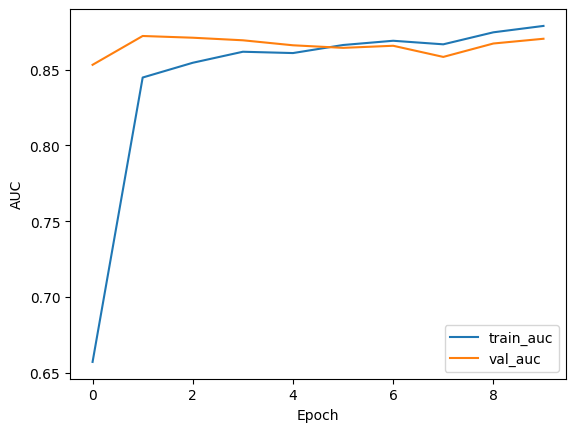

In [185]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [186]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step


In [187]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [188]:
f1_score(y_test, y_pred)

0.03058103975535168

In [189]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.885188809735989

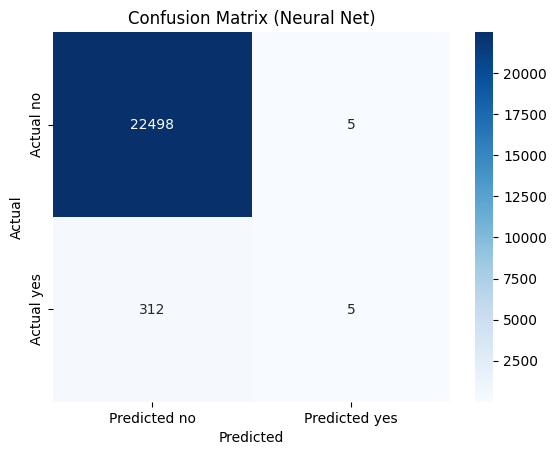

In [190]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

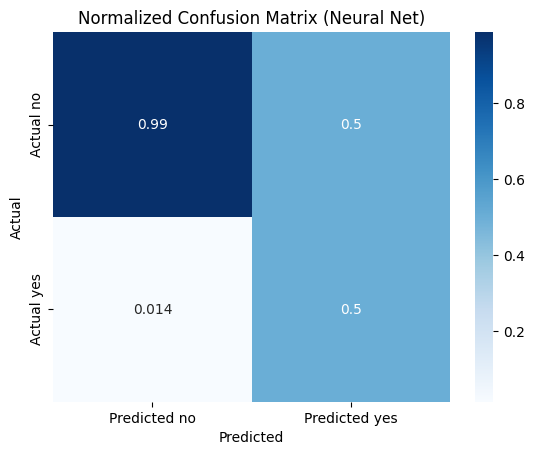

In [191]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [192]:
evaluation_tpr_fpr["Neural Net"] = (fpr, tpr)

#### Neural Net SMOTE

In [193]:
model_smote = Sequential()

model_smote.add(Input((X.shape[1],)))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(1, activation='sigmoid'))

In [194]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])
model_smote.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [195]:
history = model_smote.fit(x_res, y_res, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - auc: 0.8627 - f1_score: 0.6638 - loss: 0.4589 - val_auc: 0.8607 - val_f1_score: 0.0274 - val_loss: 0.4283
Epoch 2/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - auc: 0.9068 - f1_score: 0.6672 - loss: 0.3859 - val_auc: 0.8477 - val_f1_score: 0.0274 - val_loss: 0.4311
Epoch 3/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - auc: 0.9130 - f1_score: 0.6661 - loss: 0.3725 - val_auc: 0.8427 - val_f1_score: 0.0274 - val_loss: 0.3710
Epoch 4/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.9165 - f1_score: 0.6684 - loss: 0.3643 - val_auc: 0.8362 - val_f1_score: 0.0274 - val_loss: 0.3585
Epoch 5/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.9206 - f1_score: 0.6680 - loss: 0.3550 - val_auc: 0.8380 - val_f1_score: 0.0274 - val_loss: 0.4060
Epoch 6/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.9223 - f1_score: 0.6657 - loss: 0.3514 - val_auc: 0.8298 - val_f1_score: 0.0274 - val_loss: 0.4031
Epoch 7/10
3282/

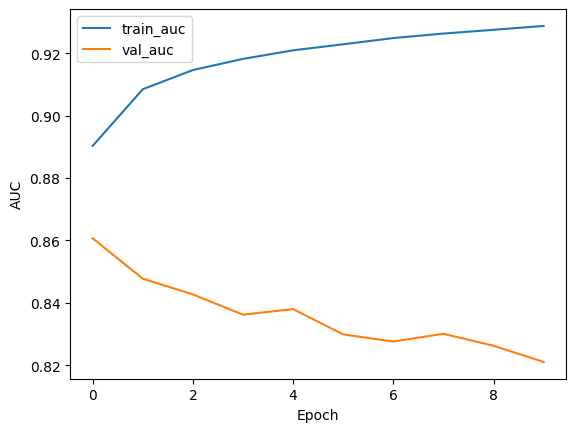

In [196]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [197]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step


In [198]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [199]:
f1_score(y_test, y_pred)

0.03058103975535168

In [200]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.885188809735989

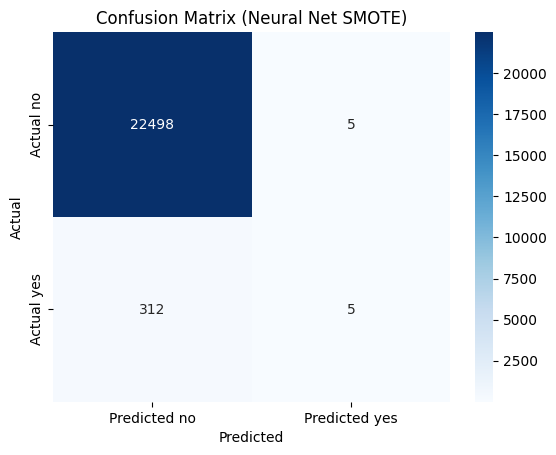

In [201]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

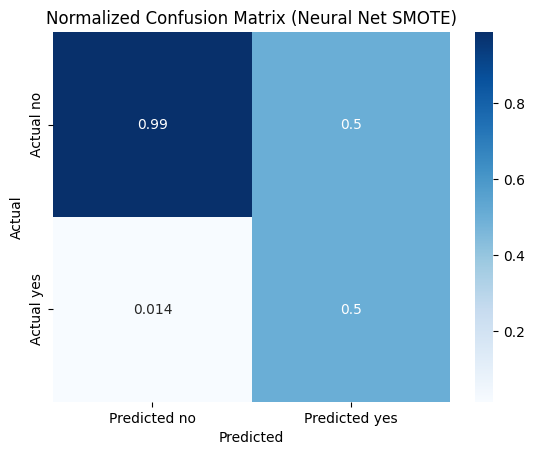

In [202]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [203]:
evaluation_tpr_fpr["Neural Net SMOTE"] = (fpr, tpr)

#### XGBoost

In [204]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.32      0.09      0.13       317

    accuracy                           0.98     22820
   macro avg       0.65      0.54      0.56     22820
weighted avg       0.98      0.98      0.98     22820

0.13432835820895522


0.854122079201217

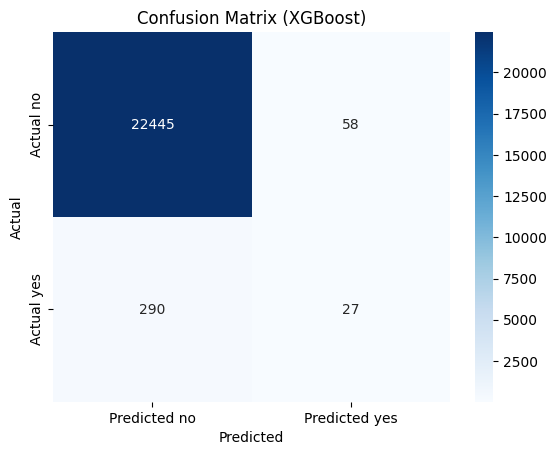

In [205]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

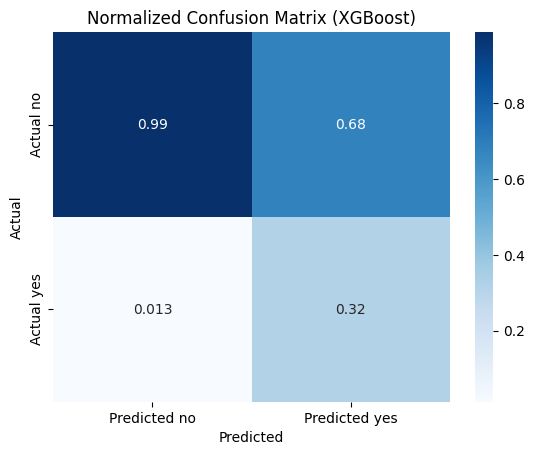

In [206]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost)')
plt.show()

In [207]:
evaluation_tpr_fpr["XGBoost"] = (fpr, tpr)

In [208]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_res, y_res)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22503
           1       0.07      0.40      0.12       317

    accuracy                           0.92     22820
   macro avg       0.53      0.66      0.54     22820
weighted avg       0.98      0.92      0.95     22820

0.12026515151515152


0.7331274862615584

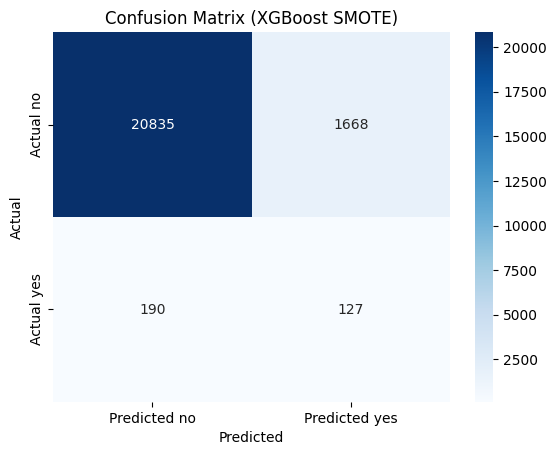

In [209]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost SMOTE)')
plt.show()

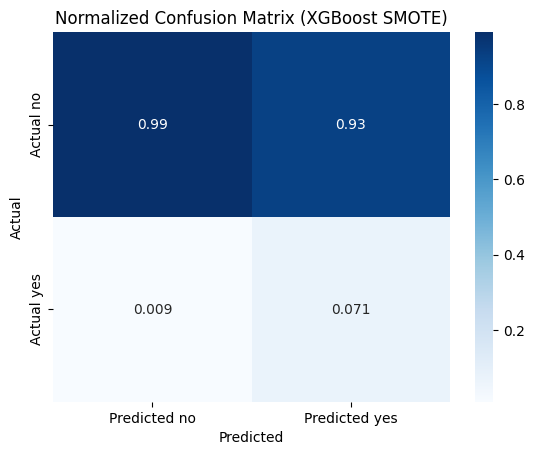

In [210]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost SMOTE)')
plt.show()

In [211]:
evaluation_tpr_fpr["XGBoost SMOTE"] = (fpr, tpr)

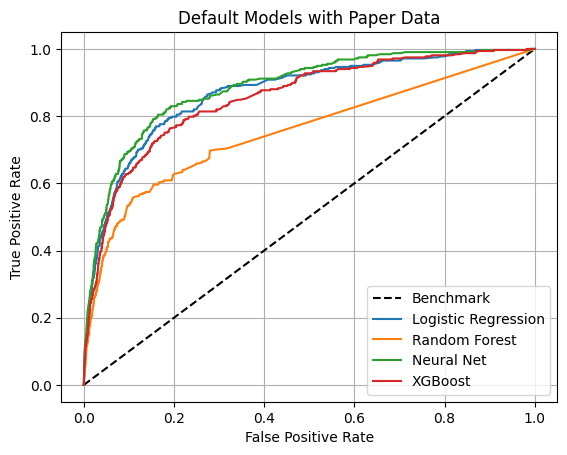

In [212]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    if "SMOTE" in model_name:
        continue
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

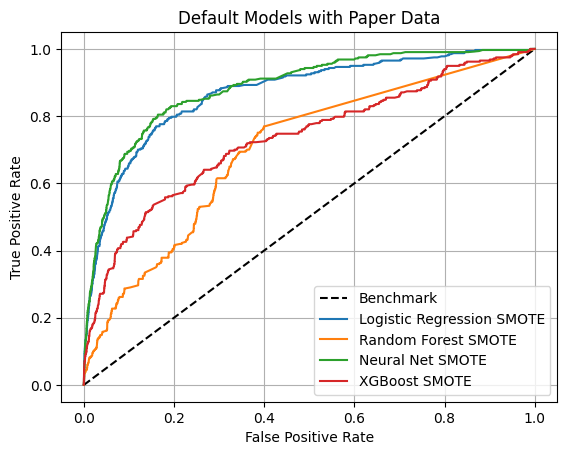

In [213]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    if "SMOTE" not in model_name:
        continue
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

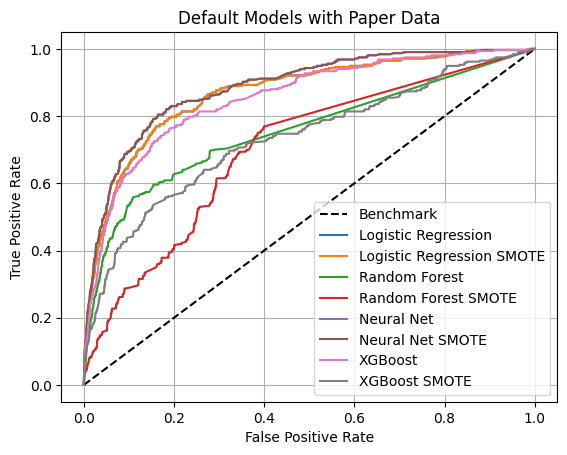

In [214]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()